In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.backend as K
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential # to see the sequence like ip --> hl1 --> hl2--> hl3 -->o/p #to build layer by layer architecture
from keras.layers import Dense # to decide the depth of layers
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from keras.models import load_model

In [8]:
df = pd.read_csv('dvd_final_csv.csv')


In [9]:
df

,inventory_id,film_id,title,rental_duration,rental_rate,length,replacement_cost,rating,category,language,store_id,rental_id,rental_date,customer_id,return_date,amount,active
0,3419,749,Rules Human,6,4.99,153,19.99,R,Horror,English,1,1520,2005-06-15 23:57:20,341,2005-06-24 23:46:20,7.99,1
1,2512,552,Majestic Floats,5,0.99,130,15.99,PG,Documentary,English,2,1778,2005-06-16 18:54:48,341,2005-06-22 16:08:48,1.99,1
2,2507,551,Maiden Home,3,4.99,138,9.99,PG,New,English,1,1849,2005-06-17 00:13:19,341,2005-06-23 18:37:19,7.99,1
3,2047,445,Hyde Doctor,5,2.99,100,11.99,G,Classics,English,1,2829,2005-06-19 21:11:30,341,2005-06-24 18:10:30,2.99,1
4,2569,563,Massacre Usual,6,4.99,165,16.99,R,Games,English,1,3130,2005-06-20 19:03:22,341,2005-06-29 18:05:22,7.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591,1148,254,Driver Annie,4,2.99,159,11.99,PG-13,Sports,English,1,12682,2006-02-14 15:16:03,245,NaN,2.99,1
14592,3998,870,Swarm Gold,4,0.99,123,12.99,PG-13,Horror,English,2,14107,2006-02-14 15:16:03,251,NaN,0.99,1
14593,1146,253,Drifter Commandments,5,4.99,61,18.99,PG-13,Action,English,2,13756,2006-02-14 15:16:03,252,NaN,4.99,1
14594,1219,270,Earth Vision,7,0.99,85,29.99,NC-17,New,English,2,15293,2006-02-14 15:16:03,263,NaN,0.99,1


In [10]:
df.isnull().sum()

inventory_id          0
film_id               0
title                 0
rental_duration       0
rental_rate           0
length                0
replacement_cost      0
rating                0
category              0
language              0
store_id              0
rental_id             0
rental_date           0
customer_id           0
return_date         183
amount                0
active                0
dtype: int64

In [11]:
df.dropna(inplace=True)


In [12]:
# Convert the 'date' column to datetime
df['rental_date'] = pd.to_datetime(df['rental_date'])

# Extract year, month, day, hour, minute, and second
df['rental_year'] = df['rental_date'].dt.year
df['rental_month'] = df['rental_date'].dt.month
df['rental_day'] = df['rental_date'].dt.day
df['rental_hour'] = df['rental_date'].dt.hour
df['rental_minute'] = df['rental_date'].dt.minute

df.drop('rental_date', axis=1, inplace=True)

df.head()

,inventory_id,film_id,title,rental_duration,rental_rate,length,replacement_cost,rating,category,language,...,rental_id,customer_id,return_date,amount,active,rental_year,rental_month,rental_day,rental_hour,rental_minute
0,3419,749,Rules Human,6,4.99,153,19.99,R,Horror,English,...,1520,341,2005-06-24 23:46:20,7.99,1,2005,6,15,23,57
1,2512,552,Majestic Floats,5,0.99,130,15.99,PG,Documentary,English,...,1778,341,2005-06-22 16:08:48,1.99,1,2005,6,16,18,54
2,2507,551,Maiden Home,3,4.99,138,9.99,PG,New,English,...,1849,341,2005-06-23 18:37:19,7.99,1,2005,6,17,0,13
3,2047,445,Hyde Doctor,5,2.99,100,11.99,G,Classics,English,...,2829,341,2005-06-24 18:10:30,2.99,1,2005,6,19,21,11
4,2569,563,Massacre Usual,6,4.99,165,16.99,R,Games,English,...,3130,341,2005-06-29 18:05:22,7.99,1,2005,6,20,19,3


In [13]:
df['return_date'] = pd.to_datetime(df['return_date'])

# Extract year, month, day, hour, minute, and second
df['return_year'] = df['return_date'].dt.year
df['return_month'] = df['return_date'].dt.month
df['return_day'] = df['return_date'].dt.day
df['return_hour'] = df['return_date'].dt.hour
df['return_minute'] = df['return_date'].dt.minute

df.drop('return_date', axis=1, inplace=True)

In [14]:
df.isnull().sum()


inventory_id        0
film_id             0
title               0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
category            0
language            0
store_id            0
rental_id           0
customer_id         0
amount              0
active              0
rental_year         0
rental_month        0
rental_day          0
rental_hour         0
rental_minute       0
return_year         0
return_month        0
return_day          0
return_hour         0
return_minute       0
dtype: int64

In [15]:
df.drop('language',axis=1, inplace=True)
df.drop('rental_year',axis=1, inplace=True)
df.drop('return_year',axis=1, inplace=True)
df.drop('rental_hour',axis=1, inplace=True)
df.drop('rental_minute',axis=1, inplace=True)
df.drop('return_hour',axis=1, inplace=True)
df.drop('return_minute',axis=1, inplace=True)
df.drop('title',axis=1,inplace=True)
df.drop(['inventory_id','film_id','store_id','rental_id','customer_id'], axis=1, inplace=True)

In [16]:
categorical_column_to_iterate = ['rating', 'category']
continuous_column_to_iterate = ['amount', 'rental_rate', 'replacement_cost']

In [17]:
df['rating'].value_counts()


rating
PG-13    3203
NC-17    2964
PG       2903
R        2868
G        2475
Name: count, dtype: int64

In [18]:
df['rating'] = df['rating'].map({"PG-13":0,'NC-17':1,'PG':2,'R':3,"G":4})


In [19]:
df['rating'].value_counts()


rating
0    3203
1    2964
2    2903
3    2868
4    2475
Name: count, dtype: int64

In [20]:
df['category'].value_counts()


category
Sports         1066
Animation      1044
Action          996
Sci-Fi          990
Family          975
Drama           946
Foreign         942
Documentary     930
Games           870
Children        855
New             851
Classics        851
Comedy          842
Horror          761
Travel          755
Music           739
Name: count, dtype: int64

In [21]:
df['category'].unique()


array(['Horror', 'Documentary', 'New', 'Classics', 'Games', 'Sci-Fi',
       'Foreign', 'Family', 'Travel', 'Music', 'Sports', 'Comedy',
       'Drama', 'Action', 'Children', 'Animation'], dtype=object)

In [22]:
df['category'] = df['category'].map({'Horror':0, 'Documentary':1, 'New':2, 'Classics':3, 'Games':4, 'Sci-Fi':5,
       'Foreign':6, 'Family':7, 'Travel':8, 'Music':9, 'Sports':10, 'Comedy':11,
       'Drama':12, 'Action':13, 'Children':14, 'Animation':15})

In [23]:
df['category'].value_counts()


category
10    1066
15    1044
13     996
5      990
7      975
12     946
6      942
1      930
4      870
14     855
2      851
3      851
11     842
0      761
8      755
9      739
Name: count, dtype: int64

EDA

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df

,rental_duration,rental_rate,length,replacement_cost,rating,category,amount,active,rental_month,rental_day,return_month,return_day
0,6,4.99,153,19.99,3,0,7.99,1,6,15,6,24
1,5,0.99,130,15.99,2,1,1.99,1,6,16,6,22
2,3,4.99,138,9.99,2,2,7.99,1,6,17,6,23
3,5,2.99,100,11.99,4,3,2.99,1,6,19,6,24
4,6,4.99,165,16.99,3,4,7.99,1,6,20,6,29
...,...,...,...,...,...,...,...,...,...,...,...,...
14409,6,4.99,185,11.99,0,4,6.99,1,7,9,7,17
14410,3,0.99,93,29.99,4,12,0.99,1,7,11,7,13
14411,6,2.99,178,10.99,0,14,3.99,1,7,12,7,19
14412,3,0.99,179,10.99,0,8,4.99,1,7,28,8,4


Distribution of Rental Rates (Histogram)

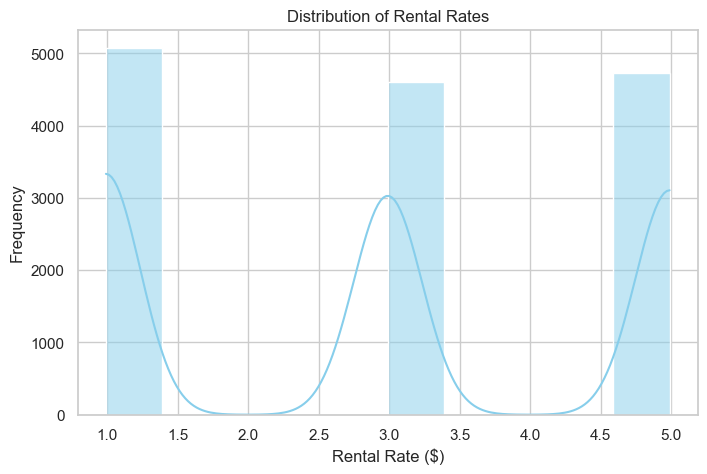

In [31]:

# Set up the visual style
sns.set(style="whitegrid")

# Plot 1: Distribution of rental rates
plt.figure(figsize=(8, 5))
sns.histplot(df['rental_rate'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Rental Rates')
plt.xlabel('Rental Rate ($)')
plt.ylabel('Frequency')
plt.show()


Bar Plot: Film Ratings Distribution

C:\Users\Prathee\AppData\Local\Temp\ipykernel_7060\3010964755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='Set2')


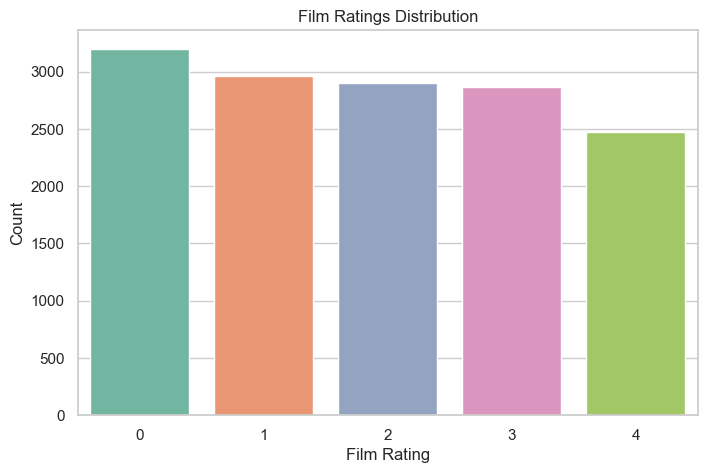

In [32]:
# Plot 2: Distribution of film ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating', palette='Set2')
plt.title('Film Ratings Distribution')
plt.xlabel('Film Rating')
plt.ylabel('Count')
plt.show()


Scatter Plot: Rental Rate vs Amount Paid

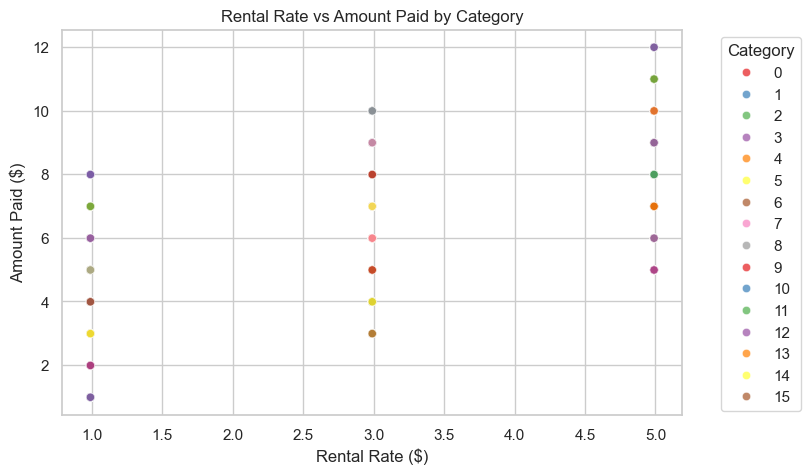

In [33]:
# Plot 3: Rental rate vs. amount paid
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='rental_rate', y='amount', hue='category', palette='Set1', alpha=0.7)
plt.title('Rental Rate vs Amount Paid by Category')
plt.xlabel('Rental Rate ($)')
plt.ylabel('Amount Paid ($)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Bar Plot: Category Distribution

C:\Users\Prathee\AppData\Local\Temp\ipykernel_7060\375128113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', palette='Set3', order=df['category'].value_counts().index)


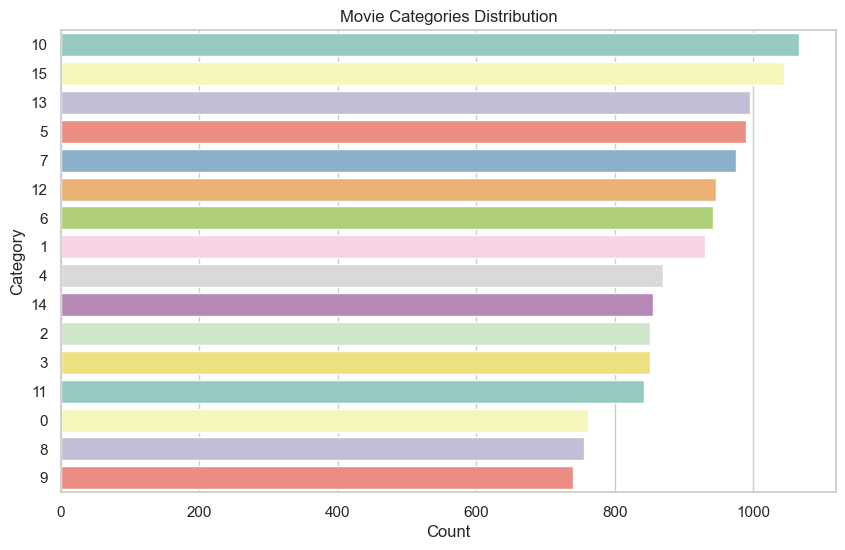

In [35]:
# Plot 4: Distribution of movie categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='category', palette='Set3', order=df['category'].value_counts().index)
plt.title('Movie Categories Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


Box Plot: Rental Rate by Film Category

C:\Users\Prathee\AppData\Local\Temp\ipykernel_7060\1773690861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category', y='rental_rate', palette='Set2')


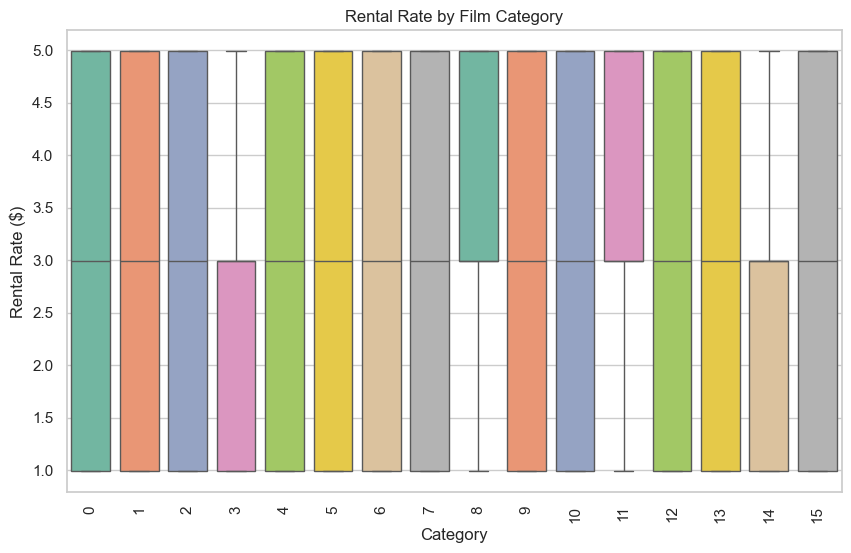

In [36]:
# Plot 5: Boxplot of rental rate by film category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='rental_rate', palette='Set2')
plt.xticks(rotation=90)
plt.title('Rental Rate by Film Category')
plt.xlabel('Category')
plt.ylabel('Rental Rate ($)')
plt.show()


Heatmap: Correlation Between Numerical Variables

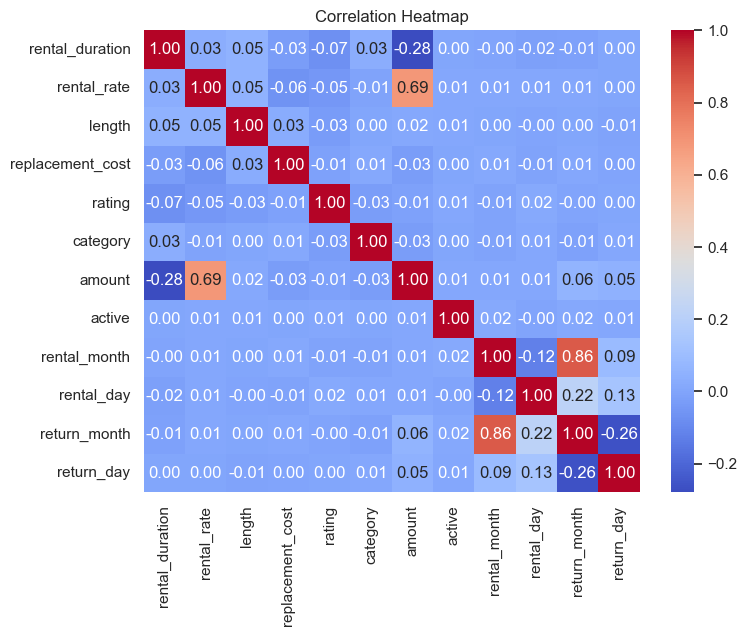

In [37]:
# Plot 6: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Encoding

In [19]:

encoders_cont = {}
for col in continuous_column_to_iterate:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders_cont[col] = encoder

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders_cont, f)

In [20]:
encoders_cont


{'amount': LabelEncoder(),
 'rental_rate': LabelEncoder(),
 'replacement_cost': LabelEncoder()}

In [21]:
df.head()


,rental_duration,rental_rate,length,replacement_cost,rating,category,amount,active,rental_month,rental_day,return_month,return_day
0,6,2,153,10,3,0,7,1,6,15,6,24
1,5,0,130,6,2,1,1,1,6,16,6,22
2,3,2,138,0,2,2,7,1,6,17,6,23
3,5,1,100,2,4,3,2,1,6,19,6,24
4,6,2,165,7,3,4,7,1,6,20,6,29


In [22]:
# Separate features and target
x = df.drop('amount', axis=1)  # Replace 'revenue_column' with the actual column name for revenue
y = df['amount']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)


In [24]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [25]:
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)


In [26]:
x_train_scaler_df=pd.DataFrame(x_train_scaler,columns = x_train.columns)
x_test_scaler_df=pd.DataFrame(x_test_scaler,columns = x_test.columns)

In [27]:
x_test_scaler_df


,rental_duration,rental_rate,length,replacement_cost,rating,category,active,rental_month,rental_day,return_month,return_day
0,1.469364,0.028329,0.778386,0.291247,0.782447,-0.576929,0.166627,1.089790,0.295262,0.775185,1.001510
1,0.050029,0.028329,1.573021,0.619720,0.782447,-0.576929,-6.001427,-0.366812,-0.853086,-0.589247,-0.428069
2,0.050029,0.028329,-0.984711,-1.515355,-0.639335,0.288525,0.166627,1.089790,0.410097,0.775185,1.001510
3,-1.369305,-1.181968,-1.282699,-1.351118,0.782447,-1.226020,0.166627,-0.366812,1.328775,0.775185,-1.307810
4,0.050029,1.238625,-0.314238,0.291247,-1.350225,1.586705,0.166627,1.089790,0.065593,0.775185,0.341704
...,...,...,...,...,...,...,...,...,...,...,...
3599,0.759697,0.028329,-0.612226,0.948193,-0.639335,-0.793293,0.166627,1.089790,0.410097,0.775185,0.671607
3600,0.050029,-1.181968,1.225368,0.455483,0.782447,-1.442383,0.166627,-0.366812,1.213940,0.775185,-1.527746
3601,-0.659638,1.238625,-0.984711,-1.186882,0.071556,0.288525,0.166627,1.089790,0.524932,0.775185,0.891543
3602,0.050029,-1.181968,0.778386,-0.858409,0.071556,-0.576929,0.166627,-0.366812,-0.967920,-0.589247,-0.757972


In [28]:
x_train_scaler_df.shape[1]


11

In [29]:
y_train.shape


(10809,)

In [39]:
from tensorflow.keras.layers import PReLU

In [53]:
model = Sequential()
#input dimension 8 neuron - developer scope
model.add(Dense(512,input_dim = x_train_scaler_df.shape[1],activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer1
model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer2
model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(64,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3
model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=0.01))) #hidden layer3

model.add(Dense(1)) #output layer
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.F1Score(),"accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

c:\Users\Prathee\Desktop\dvdrentaldl\.venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\Prathee\Desktop\dvdrentaldl\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 512)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 262,257 (1.00 MB)

 Trainable params: 262,257 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
x_train_scaler_df.shape, y_train.shape


((10809, 11), (10809,))

In [56]:
x_train_scaler_df.columns


Index(['rental_duration', 'rental_rate', 'length', 'replacement_cost',
       'rating', 'category', 'active', 'rental_month', 'rental_day',
       'return_month', 'return_day'],
      dtype='object')

In [57]:
result = model.fit(x_train_scaler_df,y_train,epochs=100,validation_split=0.2)


Epoch 1/100


c:\Users\Prathee\Desktop\dvdrentaldl\.venv\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1905 - f1_score: 1.5268 - loss: 3.8473e-07 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00

c:\Users\Prathee\Desktop\dvdrentaldl\.venv\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


271/271 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.1904 - f1_score: 1.5268 - loss: 3.8474e-07 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_accuracy: 0.1809 - val_f1_score: 1.5270 - val_loss: 3.8481e-07 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 2/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.1813 - f1_score: 1.5319 - loss: 3.9018e-07 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_accuracy: 0.1809 - val_f1_score: 1.5270 - val_loss: 3.8481e-07 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 3/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.1884 - f1_score: 1.5255 - loss: 3.8344e-07 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_accuracy: 0.1809 - val_f1_score: 1.5270 - val_loss: 3.8481e-07 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 4/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.1919 - f1_score: 1.5259 - loss: 3.8373e-07 - precision_4: 0.0000e+00 - recall_4: 0.0

In [59]:
result.history

{'accuracy': [0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,
  0.18734821677207947,

In [60]:
result_df = pd.DataFrame(result.history)
result_df

,accuracy,f1_score,loss,precision_4,recall_4,val_accuracy,val_f1_score,val_loss,val_precision_4,val_recall_4
0,0.187348,1.529274,3.872820e-07,0.0,0.0,0.180851,1.526966,3.848111e-07,0.0,0.0
1,0.187348,1.529274,3.872820e-07,0.0,0.0,0.180851,1.526966,3.848111e-07,0.0,0.0
2,0.187348,1.529274,3.872820e-07,0.0,0.0,0.180851,1.526966,3.848111e-07,0.0,0.0
3,0.187348,1.529274,3.872820e-07,0.0,0.0,0.180851,1.526966,3.848111e-07,0.0,0.0
4,0.187348,1.529274,3.872820e-07,0.0,0.0,0.180851,1.526966,3.848111e-07,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,0.187348,1.529274,3.872820e-07,0.0,0.0,0.180851,1.526966,3.848111e-07,0.0,0.0
96,0.187348,1.529274,3.872820e-07,0.0,0.0,0.180851,1.526966,3.848111e-07,0.0,0.0
97,0.187348,1.529274,3.872820e-07,0.0,0.0,0.180851,1.526966,3.848111e-07,0.0,0.0
98,0.187348,1.529274,3.872820e-07,0.0,0.0,0.180851,1.526966,3.848111e-07,0.0,0.0


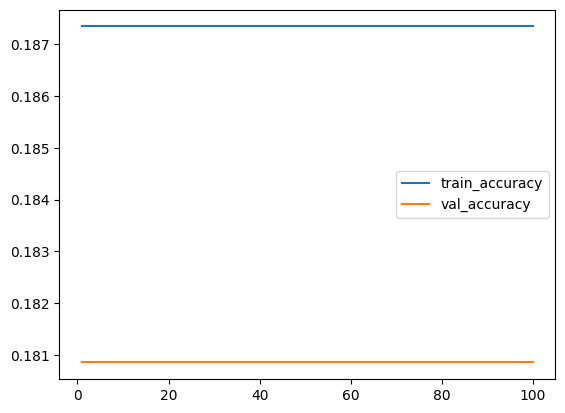

In [61]:
plt.plot(range(1,101),result_df["accuracy"],label="train_accuracy")
plt.plot(range(1,101),result_df["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

In [62]:
model.predict(x_test)


113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step


array([[-2.679612 ],
       [-3.339597 ],
       [-1.4213903],
       ...,
       [-1.4105332],
       [-2.6919239],
       [-1.4629521]], dtype=float32)

In [63]:
model.evaluate (x = x_test, y = y_test)


c:\Users\Prathee\Desktop\dvdrentaldl\.venv\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.1841 - f1_score: 1.5249 - loss: 3.8275e-07 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00


[3.7886329096181726e-07, 1.5213176012039185, 0.18201997876167297, 0.0, 0.0]

ReLu Model

In [64]:
model1 = Sequential()
# Input layer (match input shape to your data)
model1.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))

# Hidden layers
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))



model1.add(Dense(1))

# Compile the model for regression with 'mse' loss function
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError(), MeanAbsoluteError()])

c:\Users\Prathee\Desktop\dvdrentaldl\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model1.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 512)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,921 (788.75 KB)

 Trainable params: 201,921 (788.75 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
result = model1.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 38s 65ms/step - loss: 5.7905 - mean_absolute_error: 1.9032 - mean_squared_error: 5.7905 - val_loss: 2.2165 - val_mean_absolute_error: 1.2303 - val_mean_squared_error: 2.2165
Epoch 2/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - loss: 1.3528 - mean_absolute_error: 0.8815 - mean_squared_error: 1.3528 - val_loss: 0.5350 - val_mean_absolute_error: 0.5089 - val_mean_squared_error: 0.5350
Epoch 3/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - loss: 0.4307 - mean_absolute_error: 0.4436 - mean_squared_error: 0.4307 - val_loss: 0.3257 - val_mean_absolute_error: 0.3918 - val_mean_squared_error: 0.3257
Epoch 4/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.4677 - mean_absolute_error: 0.4625 - mean_squared_error: 0.4677 - val_loss: 0.4918 - val_mean_absolute_error: 0.4580 - val_mean_squared_error: 0.4918
Epoch 5/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 0.2603 - mean_absolute_error: 0.3248 - mean_squared_error: 0.2603 - val_loss:

In [67]:
result.history

{'loss': [4.109121322631836,
  1.049215316772461,
  0.4210285246372223,
  0.38264304399490356,
  0.2450191229581833,
  0.18834133446216583,
  0.1529998481273651,
  0.20980854332447052,
  0.17281381785869598,
  0.1584838181734085,
  0.09771186858415604,
  0.06080188974738121,
  0.11036071181297302,
  0.08067880570888519,
  0.06588714569807053,
  0.05023093521595001,
  0.05444151908159256,
  0.059936799108982086,
  0.0456201545894146,
  0.03630443662405014,
  0.07098878175020218,
  0.08082765340805054,
  0.02167004719376564,
  0.08712203055620193,
  0.040797051042318344,
  0.02213946357369423,
  0.07897928357124329,
  0.0455733947455883,
  0.03390102460980415,
  0.034763045608997345,
  0.11021063476800919,
  0.02821069024503231,
  0.033578868955373764,
  0.029122406616806984,
  0.01708241179585457,
  0.015226231887936592,
  0.06829693168401718,
  0.01998482644557953,
  0.03174804523587227,
  0.06298040598630905,
  0.016263281926512718,
  0.036413151770830154,
  0.020151806995272636,
  0.

In [68]:
result.history.keys()


dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])

In [72]:
result_df = pd.DataFrame(result.history)
result_df

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,4.109121,1.574874,4.109121,2.216516,1.230294,2.216516
1,1.049215,0.768160,1.049215,0.534953,0.508904,0.534953
2,0.421029,0.430470,0.421029,0.325667,0.391832,0.325667
3,0.382643,0.407114,0.382643,0.491829,0.458029,0.491829
4,0.245019,0.308266,0.245019,0.252893,0.310925,0.252893
...,...,...,...,...,...,...
95,0.003812,0.028435,0.003812,0.003051,0.015887,0.003051
96,0.030143,0.079169,0.030143,0.011330,0.070659,0.011330
97,0.006798,0.044006,0.006798,0.003407,0.017021,0.003407
98,0.017860,0.062059,0.017860,0.047076,0.137906,0.047076


In [69]:
# Evaluate the model
test_loss = model1.evaluate(x_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0049 - mean_absolute_error: 0.0388 - mean_squared_error: 0.0049
Test Loss (MSE): [0.006086729466915131, 0.006086729466915131, 0.03859412670135498]


In [70]:
from sklearn.metrics import r2_score
y_pred = model1.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
R² score: 0.9989000558853149


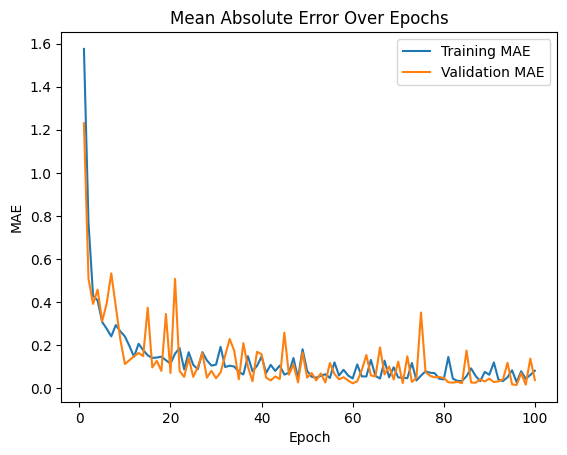

In [73]:
# Plot Mean Absolute Error (MAE) over epochs
plt.plot(range(1, 101), result_df['mean_absolute_error'], label='Training MAE')
plt.plot(range(1, 101), result_df['val_mean_absolute_error'], label='Validation MAE')

plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

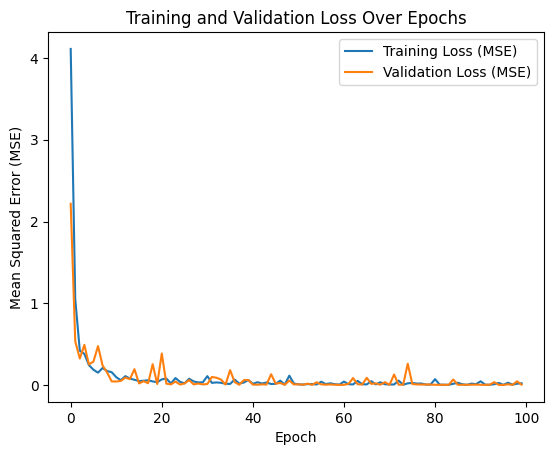

In [74]:
# Plot the training and validation loss
plt.plot(result.history['loss'], label='Training Loss (MSE)')
plt.plot(result.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


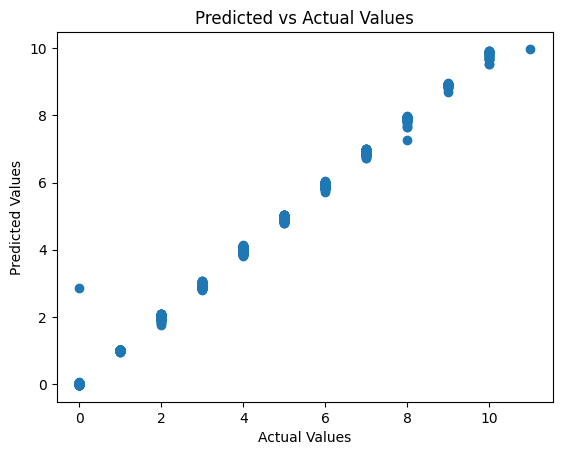

In [75]:
# Get predictions for the test set
y_pred = model1.predict(x_test)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [76]:
# Get predictions for the test set
y_pred = model1.predict(x_test)

# If y_test is a pandas Series, convert it to a NumPy array
if isinstance(y_test, pd.Series):
    y_test = y_test.values

# Flatten y_pred if it's a 2D array
y_pred = y_pred.flatten()

# Calculate residuals (errors)
residuals = y_test - y_pred

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


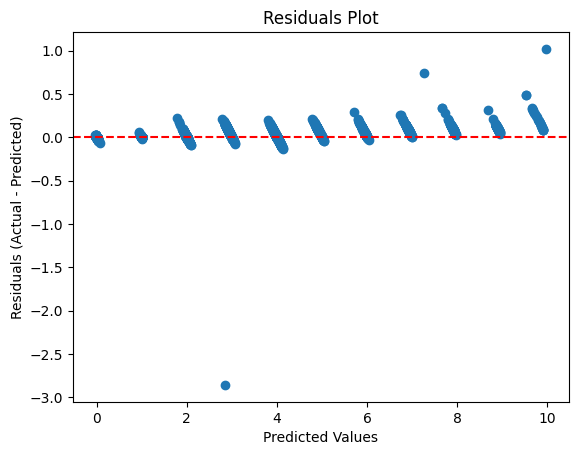

In [77]:
# Plot residuals
plt.scatter(y_pred, residuals)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [5]:
model1.save("dl_relu.h5")

NameError: name 'model1' is not defined

In [3]:
new_model = load_model("dl_relu.h5")

NameError: name 'load_model' is not defined

In [4]:
first_row = x_test.iloc[0].to_numpy()


NameError: name 'x_test' is not defined

In [2]:
first_row


NameError: name 'first_row' is not defined

In [1]:
for x in first_row:
    print(type(x))

NameError: name 'first_row' is not defined

In [82]:
new_model.predict(np.array([first_row]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[2.0111609]], dtype=float32)

In [ ]:
x_test['rental_month'].value_counts()


In [6]:
df['length'].min()


NameError: name 'df' is not defined

In [ ]:
x_test.columns


In [ ]:
encoders_cont


In [ ]:
encoders_cont['replacement_cost'].classes_


In [ ]:
array = ['Horror', 'Documentary', 'New', 'Classics', 'Games', 'Sci-Fi',
            'Foreign', 'Family', 'Travel', 'Music', 'Sports', 'Comedy',
            'Drama', 'Action', 'Children', 'Animation']

In [ ]:
category = 'Horror'
num = array.index(category)
print(float(num))

In [ ]:
details1.append(float(num))